<a href="https://colab.research.google.com/github/velezcanizares/Nubes-de-punto-heatmap/blob/main/Nubes_de_puntos_y_mapas_de_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nubes de puntos y mapas de calor

---



importamos librerias y cargamos la data, en este caso, utilizaremos un subset de 4 variables como se indica en el código y ajustaremos los márgenes las figuras para una mejor visualización. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/base_datos_2008.csv")

#Eliminamos los datos faltantes y seleccionamos un subset
df.dropna(inplace= True,subset=["ArrDelay","DepDelay","Distance","AirTime"])

sns.set(rc={'figure.figsize':(15,10)})

In [36]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,643836.0,643836.000000,643836.000000,643836.000000,643836.000000,643836.000000,643836.000000,643836.000000,643836.000000,643836.000000,...,643836.000000,643836.000000,643836.000000,643836.0,643836.0,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,2008.0,1.088075,15.476227,3.845332,1343.623971,1331.735263,1490.957857,1500.142828,2152.047793,126.380563,...,715.923001,6.714311,16.287553,0.0,0.0,15.328086,2.905229,15.583929,0.093258,22.284122
std,0.0,0.283404,8.803794,1.937074,476.671941,462.516719,503.555002,480.286297,1893.233204,69.398924,...,550.563988,4.911328,10.786543,0.0,0.0,37.946358,19.637194,30.929343,1.678565,39.605507
min,2008.0,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,24.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000,8.000000,2.000000,935.000000,930.000000,1115.000000,1120.000000,617.000000,76.000000,...,325.000000,4.000000,10.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,1.000000,15.000000,4.000000,1334.000000,1325.000000,1520.000000,1521.000000,1524.000000,109.000000,...,564.000000,5.000000,14.000000,0.0,0.0,0.000000,0.000000,4.000000,0.000000,0.000000
75%,2008.0,1.000000,23.000000,5.000000,1734.000000,1720.000000,1914.000000,1910.000000,3374.000000,157.000000,...,948.000000,8.000000,19.000000,0.0,0.0,16.000000,0.000000,19.000000,0.000000,28.000000
max,2008.0,2.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,9202.000000,693.000000,...,4962.000000,213.000000,383.000000,0.0,0.0,1158.000000,1049.000000,1357.000000,136.000000,897.000000


A continuación seleccionaremos los vuelos de solo 3 aeropuertos: ATL, HOU e IND. Con una sample desordenamos el data frame y luego seleccionamos solo las 1000 primeras filas. De esta manera obtenemos una muestra de nuestra base de datos con la que podemos trabajar de manera más ágil.

In [13]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
325345,2008,1,7,1,1909.0,1910,2118.0,2125,EV,4233,...,2.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
341180,2008,1,29,2,2241.0,2245,2225.0,2236,EV,4753,...,3.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
357736,2008,1,6,7,1303.0,1306,1440.0,1449,FL,85,...,6.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
646885,2008,2,15,5,1209.0,1210,1340.0,1350,WN,2985,...,12.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
354947,2008,1,2,3,1705.0,1651,1752.0,1724,FL,269,...,4.0,20.0,0,NaN,0,0.0,0.0,14.0,0.0,14.0


Podemos realizar un gráfico para verificar si hay correlación entre variables

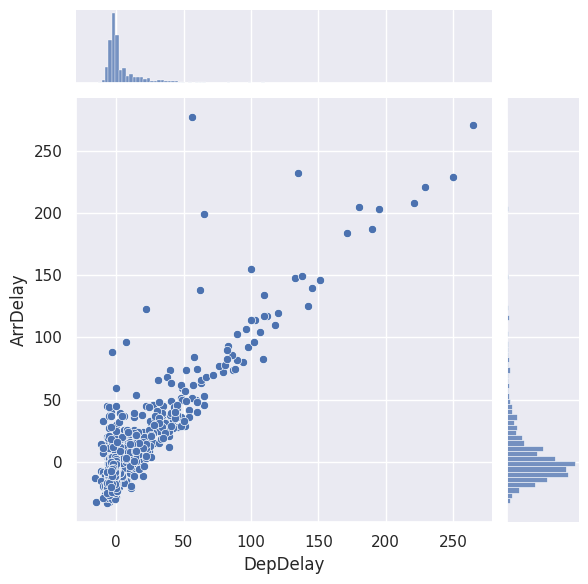

In [ ]:
sns.jointplot(x= "DepDelay", y= "ArrDelay", data= df2)

Podemos observar que existe una correlación positiva entre variables, lo cual es lógico, ya que, en este caso de estudio, al haber un retraso en la salida del vuelo, también lo habrá en la llegada.

Ahora analizaremos solo los vuelos que tengan un retraso en la salida y llegada de menos de 40 minutos. Para esto seleccionaremos un subset del df2.

In [ ]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

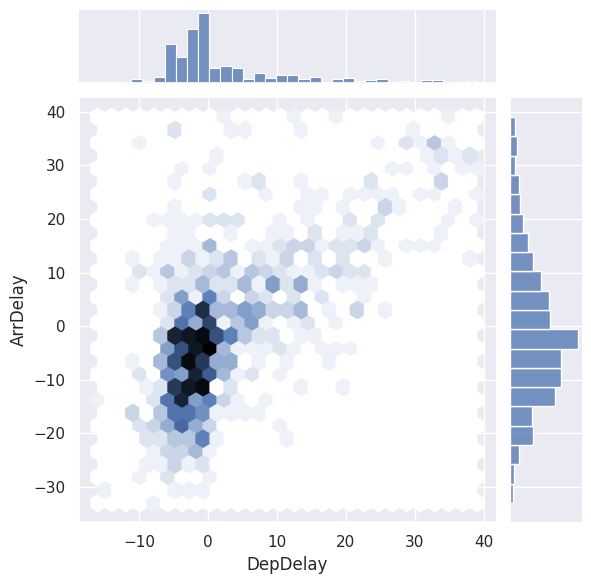

In [6]:
sns.jointplot(x= "DepDelay", y= "ArrDelay", data= df3, kind= "hex")

En la anterior figura podemos ver la distribución univariada y en conjunto, donde se concentran las variables. En este caso, podemos ver que la mayoría de los casos tiene un adelanto de 20 min o retraso de 10 min.

Para el mapa de calor crearemos un nuevo objeto a través de un groupby. Aplicaremos la media a una varibale de retraso.

In [43]:
gb_df = pd.DataFrame(df2.groupby(["Origin", "DayofMonth"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,DayofMonth,DepDelay
0,ATL,1,5.730769
1,ATL,2,15.875000
2,ATL,3,19.000000
3,ATL,4,7.652174
4,ATL,5,8.692308


Ahora corresponde transfromar este objeto recién creado, para poderlo gráficar. Donde conseguiremos que cada origen sea una columna, el dia del mes sea otra columna y que el retraso DepDelay sea los valores de la tabla.

In [38]:
pivoted_df = gb_df.pivot(index="DayofMonth", columns="Origin", values="DepDelay")
pivoted_df

Origin,ATL,HOU,IND
DayofMonth,,,
1,11.143312,20.824561,22.698113
2,21.150389,24.426752,34.846154
3,19.062117,19.157143,9.375940
4,8.702867,12.694079,7.511450
5,4.615873,25.591760,5.008333
6,9.186380,17.030303,9.766667
7,8.183012,16.500000,11.462687
8,7.237489,13.623377,6.992366
9,3.532069,6.810700,-0.613636


<Axes: xlabel='Origin', ylabel='DayofMonth'>

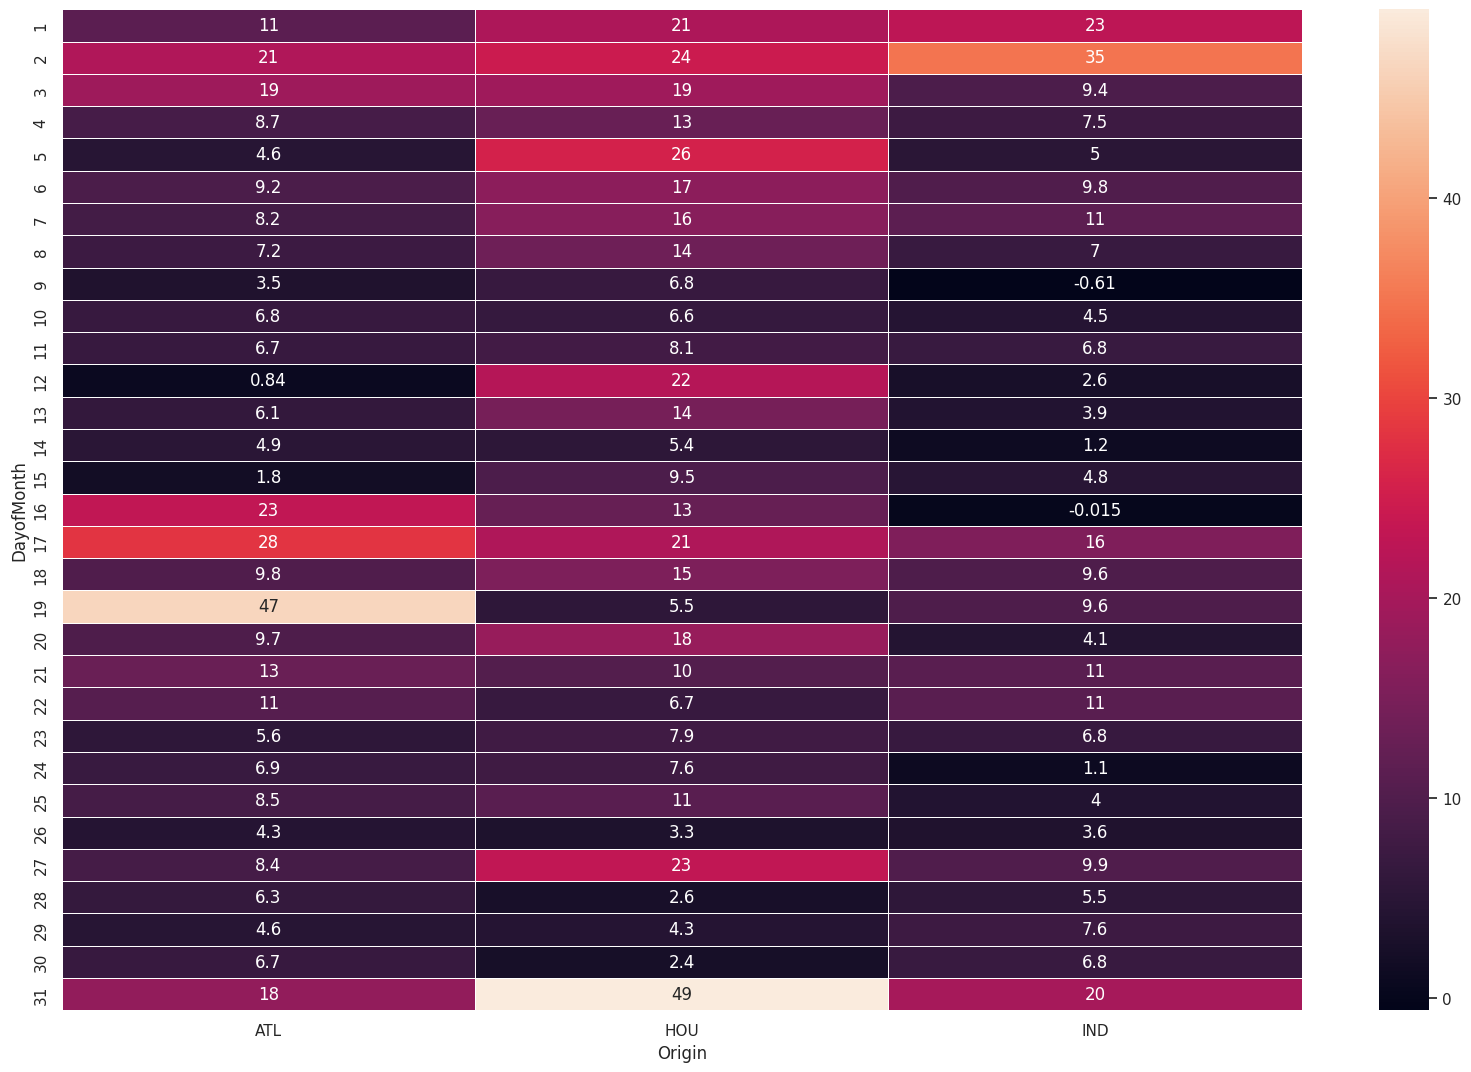

In [41]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(data = pivoted_df, annot= True, linewidths =.5)

Las conclusiones que podemos sacar del anterior gráfico es que, en Atlanta a mitad de mes se dan por lo general mayores retrasos. En el caso de Houston el día 31 es donde existe el mayor retraso. En el caso de Indiana tiene un comportamiento más regular pero los primeros días del mes en donde hay mayo retraso.